# Dataset Description:

Here we have a datasets that records important details like Qualification, Experience, Profile, Rating & Fees of the doctor and we are suppose to build a model predicting the doctor's consulting fees.

# Importing the Dataset:

In [16]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv("Final_Train.csv")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [18]:
df.shape

(5961, 7)

# Checking null values in Dataset:

In [19]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

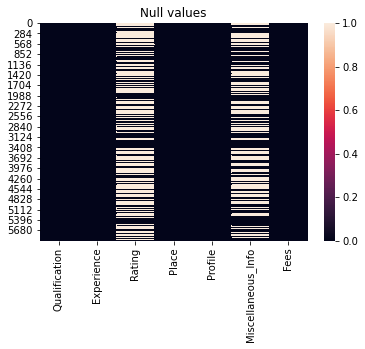

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

With the help of heatmap we can see that there are Null values present in the dataset.

Through observation we go to know that there are lot of blank rows present in Rating and Miscellaneous_Info column, which are shown as null values.

We would replace those blank rows with nan and then drop those.

In [21]:
df.replace(" ",np.nan)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [25]:
df.dropna(subset= ["Miscellaneous_Info"], inplace=True)

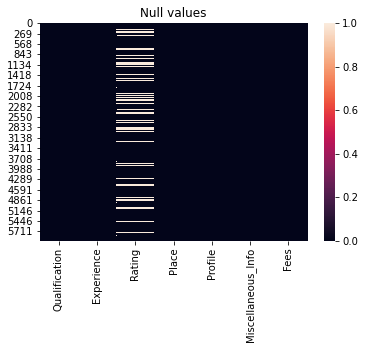

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [27]:
df.isnull().sum()

Qualification           0
Experience              0
Rating                764
Place                   0
Profile                 0
Miscellaneous_Info      0
Fees                    0
dtype: int64

In [30]:
df.dropna(subset= ["Rating"], inplace=True)

In [31]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

Now there are no null values in the dataset.

# Checking the datatypes of the columns:

In [32]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# Encoding the Dataset:

In [34]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [35]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [36]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,263.0,16.0,0.0,203.0,5.0,105.0,100
1,28.0,3.0,49.0,553.0,0.0,1361.0,350
4,2.0,12.0,0.0,226.0,0.0,228.0,250
7,53.0,1.0,50.0,26.0,1.0,1754.0,200
12,114.0,54.0,49.0,95.0,1.0,1252.0,200
...,...,...,...,...,...,...,...
5953,758.0,28.0,43.0,296.0,5.0,697.0,100
5956,646.0,10.0,49.0,53.0,3.0,1324.0,300
5958,357.0,35.0,48.0,143.0,4.0,1112.0,600
5959,569.0,6.0,41.0,543.0,4.0,1930.0,100


# Describing the dataset:

In [38]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,369.277454,19.397749,32.789290,266.121847,2.218471,1227.390376,343.440047
std,246.582641,18.227719,20.286961,164.862899,1.452135,682.289194,192.680230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,144.000000,5.000000,0.000000,128.000000,1.000000,636.000000,200.000000
50%,361.000000,12.000000,44.000000,257.000000,2.000000,1276.000000,300.000000
75%,569.000000,30.000000,48.000000,407.000000,3.000000,1795.000000,500.000000
max,845.000000,54.000000,50.000000,560.000000,5.000000,2374.000000,950.000000


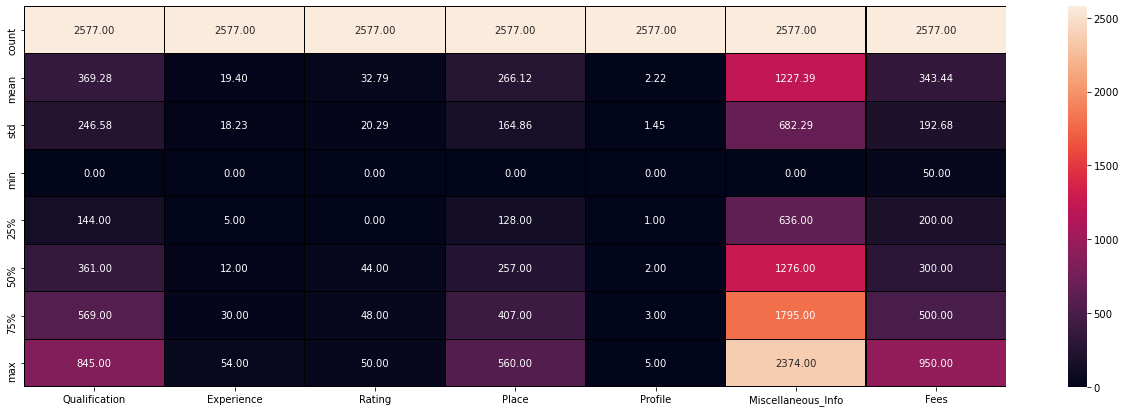

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the Target column:

In [40]:
df.corr()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.004457,0.052745,-0.008174,0.433650,-0.208359,0.254904
Experience,0.004457,1.000000,-0.157775,-0.030889,0.000837,-0.031657,-0.027343
Rating,0.052745,-0.157775,1.000000,-0.001943,-0.032303,0.283050,0.033671
Place,-0.008174,-0.030889,-0.001943,1.000000,-0.006823,0.002291,-0.046392
Profile,0.433650,0.000837,-0.032303,-0.006823,1.000000,-0.299759,0.157561
Miscellaneous_Info,-0.208359,-0.031657,0.283050,0.002291,-0.299759,1.000000,-0.082892
Fees,0.254904,-0.027343,0.033671,-0.046392,0.157561,-0.082892,1.000000


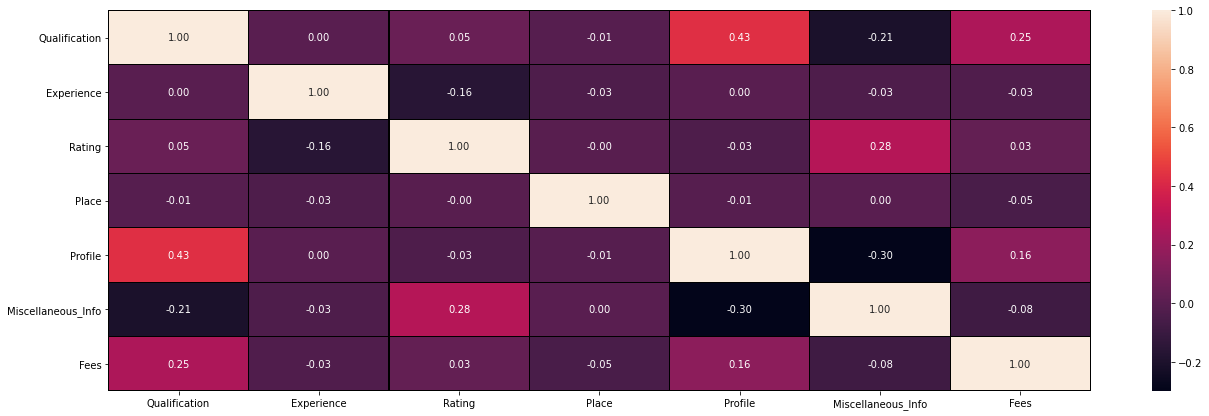

In [41]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Checking the columns which are positively and negatively correlated with the target column.

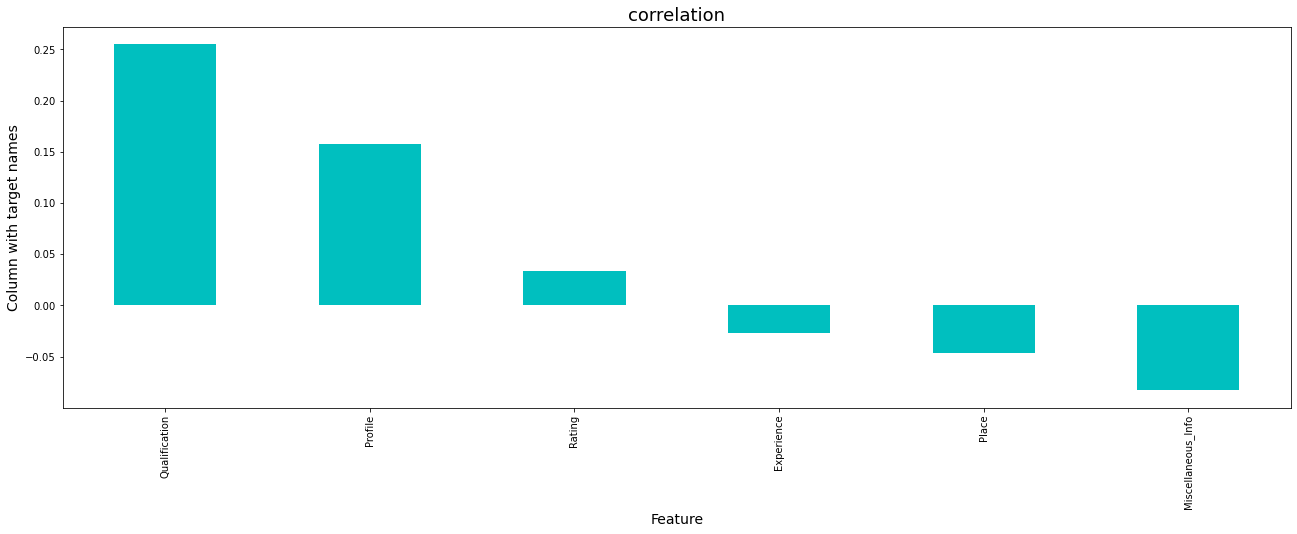

In [42]:
plt.figure(figsize=(22,7))
df.corr()['Fees'].sort_values(ascending=False).drop(['Fees']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Checking the skewness and Outliers:

In [43]:
df.skew()

Qualification         0.170177
Experience            0.911948
Rating               -0.869777
Place                 0.137302
Profile               0.514588
Miscellaneous_Info   -0.103167
Fees                  0.555813
dtype: float64

We can see that the data has skewness. So we will be removing skewness.

In [44]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

df_new = pd.DataFrame(df_new,columns=df.columns)

In [45]:
df_new.skew()

Qualification        -0.287343
Experience           -0.021591
Rating               -0.920664
Place                -0.246650
Profile              -0.031098
Miscellaneous_Info   -0.323885
Fees                 -0.074531
dtype: float64

In [46]:
x=df_new

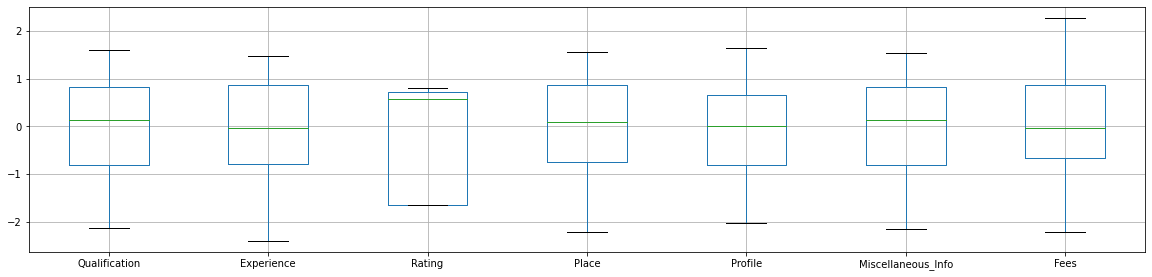

In [47]:
x.iloc[:,0:7].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

There are no outliers present in the dataset.

# Separating the columns into x(independent variables) and y(Target variable):

In [48]:
x= df.drop("Fees",axis=1)
y= df["Fees"]

# Scaling the data using Min-Max scaler:

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [50]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.07110670247418549
At random state 0,the training accuracy is:- 0.07119240746494382


At random state 1,the training accuracy is:- 0.06746915903176232
At random state 1,the training accuracy is:- 0.08137559958281959


At random state 2,the training accuracy is:- 0.0646369174285285
At random state 2,the training accuracy is:- 0.09780791791318966


At random state 3,the training accuracy is:- 0.0740951149630289
At random state 3,the training accuracy is:- 0.0601168497536364


At random state 4,the training accuracy is:- 0.06890443963560733
At random state 4,the training accuracy is:- 0.07882421839025355


At random state 5,the training accuracy is:- 0.07400143936417114
At random state 5,the training accuracy is:- 0.05856237640794337


At random state 6,the training accuracy is:- 0.07708518482736837
At random state 6,the training accuracy is:- 0.04841137129164397


At random state 7,the training accuracy is:- 0.07522065524386212
At random stat

At random state 65,the training accuracy is:- 0.07154976319496797
At random state 65,the training accuracy is:- 0.06956183016712936


At random state 66,the training accuracy is:- 0.07066416616308435
At random state 66,the training accuracy is:- 0.0722508667269064


At random state 67,the training accuracy is:- 0.07041135651345376
At random state 67,the training accuracy is:- 0.06764174268499545


At random state 68,the training accuracy is:- 0.06703153787077143
At random state 68,the training accuracy is:- 0.0811041183180422


At random state 69,the training accuracy is:- 0.06884757427799448
At random state 69,the training accuracy is:- 0.08033318559792646


At random state 70,the training accuracy is:- 0.07085565497262492
At random state 70,the training accuracy is:- 0.07252652790077696


At random state 71,the training accuracy is:- 0.07802904329434479
At random state 71,the training accuracy is:- 0.03911451742293204


At random state 72,the training accuracy is:- 0.0684034800687342

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=16)

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
pred_test=lr.predict(x_test)

In [54]:
print(r2_score(y_test,pred_test))

0.07596550796795176


# Cross validation of the model:

In [55]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.06534667871599958 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 3 the cv score is 0.06619114877299766 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 4 the cv score is 0.06694715076823846 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 5 the cv score is 0.06520599127782871 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 6 the cv score is 0.06354361826272283 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 7 the cv score is 0.06279966374117886 and accuracy score for training is -0.09352033593436726 and accuracy for the testing is 0.07596550796795176


At cross fold 8 the cv score

We will be selecting cv=5.

# Regularization:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [109]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.07591682163633684

In [110]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.06521769332251844

# Ensemble Technique:

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto", "sqrt", "log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [63]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 10.461339930913205
Cross Val Score: 11.048322001740745


In [64]:
import pickle 
filename = 'ConsultationFees.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Using the Test dataset:

# Importing the Test dataset:

In [83]:
test_df=pd.read_csv("Final_Test.csv")

In [84]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [85]:
test_df.shape

(1987, 6)

# Checking & treating null values in Test Dataset:

In [86]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [87]:
test_df.dropna(subset= ["Miscellaneous_Info"], inplace=True)

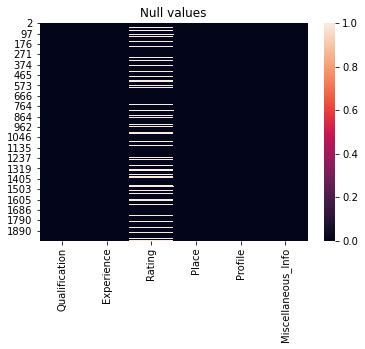

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(test_df.isnull())
plt.title("Null values")
plt.show()

In [89]:
test_df.dropna(subset= ["Rating"], inplace=True)

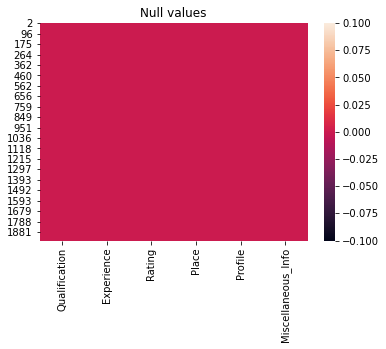

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(test_df.isnull())
plt.title("Null values")
plt.show()

In [91]:
test_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [92]:
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [98]:
test_df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,173.126857,17.816000,21.772571,178.421714,2.289143,427.633143
std,115.438369,17.157414,13.834249,107.467750,1.466579,242.589291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,4.000000,3.000000,83.500000,1.000000,217.500000
50%,168.000000,11.000000,29.000000,177.000000,2.000000,435.000000
75%,266.000000,28.000000,33.000000,272.500000,4.000000,632.500000
max,392.000000,51.000000,35.000000,365.000000,5.000000,840.000000


# Checking the skewness and Outliers:

In [99]:
test_df.skew()

Qualification         0.149452
Experience            0.906658
Rating               -0.743354
Place                 0.056171
Profile               0.407619
Miscellaneous_Info   -0.053948
dtype: float64

In [103]:
from sklearn.preprocessing import power_transform
test_df_new = power_transform(test_df)

test_df_new = pd.DataFrame(df_new,columns=test_df.columns)

In [104]:
test_df_new.skew()

Qualification        -0.275709
Experience           -0.067679
Rating               -0.806679
Place                -0.278674
Profile              -0.047751
Miscellaneous_Info   -0.305297
dtype: float64

In [105]:
#loading the model

fitted_model= pickle.load(open("ConsultationFees.pkl", "rb"))

In [106]:
fitted_model

RandomForestRegressor()

In [107]:
#prediction over test dataset

predictions= fitted_model.predict(test_df_new)

In [108]:
predictions

array([204.5, 204.5, 204.5, 276. , 204.5, 204.5, 204.5, 204.5, 204.5,
       204.5, 276. , 204.5, 287. , 204.5, 204.5, 204.5, 276. , 276. ,
       204.5, 204.5, 399.5, 204.5, 204.5, 204.5, 276. , 204.5, 399.5,
       399.5, 276. , 287. , 204.5, 287. , 204.5, 276. , 287. , 204.5,
       204.5, 276. , 204.5, 276. , 287. , 204.5, 287. , 204.5, 276. ,
       204.5, 276. , 287. , 204.5, 204.5, 204.5, 204.5, 204.5, 204.5,
       204.5, 204.5, 204.5, 399.5, 287. , 204.5, 204.5, 287. , 204.5,
       204.5, 204.5, 204.5, 204.5, 204.5, 204.5, 287. , 204.5, 204.5,
       204.5, 204.5, 287. , 204.5, 204.5, 287. , 276. , 204.5, 204.5,
       204.5, 399.5, 276. , 204.5, 204.5, 204.5, 204.5, 399.5, 399.5,
       204.5, 204.5, 204.5, 204.5, 399.5, 204.5, 204.5, 204.5, 204.5,
       204.5, 204.5, 204.5, 204.5, 276. , 399.5, 204.5, 204.5, 204.5,
       287. , 276. , 204.5, 204.5, 399.5, 276. , 276. , 204.5, 204.5,
       204.5, 287. , 204.5, 276. , 204.5, 204.5, 204.5, 204.5, 204.5,
       204.5, 204.5,